In [24]:
import pandas as pd
from collections import defaultdict,OrderedDict
def change_time_format(time):
    time = time.replace("年","-").replace("月","-").replace("日","").replace("時",":").replace("分",":").replace("秒","")
    year = int(time.split("-")[0])
    time = time.replace(str(year),str(year+1911))
    time = time.split()
    ac_time = time[1].split(":")
    if int(ac_time[1]) > 0:
        ac_time[1] = "00"
        ac_time[0] = str(int(ac_time[0])+1)
    if len(ac_time[0]) < 2:
        ac_time[0] = "0" + ac_time[0]
    if ac_time[0] == '24':
        return time[0]+" "+"23"+":00:00"
    else:
        return time[0]+" "+ac_time[0]+":00:00"

def get_weather_data(district):
    import os
    path = "data/weather/all_data"
    all_weather = {}
    for filename in os.listdir(path):
        all_weather[filename.replace(".csv","")] = pd.read_csv(path+"/"+filename)
    DataWithWeather = []
    # 雨量
    all_rain =  defaultdict(list)
    # 風速
    all_WS = defaultdict(list)
    # 最大陣風
    all_WSGust = defaultdict(list)
    T_time = []
    for i in district["發生時間"].to_list():
        T_time.append(change_time_format(i))
    count_rain_dic = defaultdict()
    count_WS_dic = defaultdict()
    count_WSGust_dic = defaultdict()
    for i in range(0,len(district["測站"].to_list())):
        try:
            a = all_weather[district["測站"].to_list()[i].split("\'")[1]]["Unnamed: 18"].to_list().index(T_time[i])
            precp = all_weather[district["測站"].to_list()[i].split("\'")[1]]["Precp"].to_list()[a]
            if precp == "t" or precp == "T" or precp == "&" or precp == "X":
                precp = float(0.0)
                count_rain = all_weather[district["測站"].to_list()[i].split("\'")[1]]["Precp"].to_list().count("t") + all_weather[district["測站"].to_list()[i].split("\'")[1]]["Precp"].to_list().count("T") + all_weather[district["測站"].to_list()[i].split("\'")[1]]["Precp"].to_list().count("&") + all_weather[district["測站"].to_list()[i].split("\'")[1]]["Precp"].to_list().count("X") + all_weather[district["測站"].to_list()[i].split("\'")[1]]["Precp"].to_list().count(0.0)
            else:
                count_rain = all_weather[district["測站"].to_list()[i].split("\'")[1]]["Precp"].to_list().count(precp)
            if precp not in count_rain_dic.keys():
                count_rain_dic[str(precp)] = count_rain
            WS = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WS"].to_list()[a]
            if WS == "/" or WS == "X" or WS == "...":
                WS = float(0.0)
                count_WS = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WS"].to_list().count("/") + all_weather[district["測站"].to_list()[i].split("\'")[1]]["WS"].to_list().count("X") + all_weather[district["測站"].to_list()[i].split("\'")[1]]["WS"].to_list().count("...") + all_weather[district["測站"].to_list()[i].split("\'")[1]]["WS"].to_list().count(0.0)
            else:
                count_WS = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WS"].to_list().count(WS)
            if WS not in count_WS_dic.keys():
                count_WS_dic[str(WS)] = count_WS
            WSGust = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WSGust"].to_list()[a]
            if WSGust == "..." or WSGust == "X":
                WSGust = float(0.0)
                count_WSGust = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WSGust"].to_list().count("...") + all_weather[district["測站"].to_list()[i].split("\'")[1]]["WSGust"].to_list().count("X") + all_weather[district["測站"].to_list()[i].split("\'")[1]]["WSGust"].to_list().count(0.0)
            else:
                count_WSGust = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WSGust"].to_list().count(WSGust)
            if WSGust not in count_WSGust_dic.keys():
                count_WSGust_dic[str(WSGust)] = count_WSGust
            DataWithWeather.append([float(precp),float(WS),float(WSGust)])
            all_rain[T_time[i].split()[1].split(":")[0]].append(float(precp))
            all_WS[T_time[i].split()[1].split(":")[0]].append(float(WS))
            all_WSGust[T_time[i].split()[1].split(":")[0]].append(float(WSGust))
        except KeyError:
            DataWithWeather.append(["err"])
        except ValueError:
            DataWithWeather.append(["err"])
    return all_rain, all_WS, all_WSGust, count_rain_dic, count_WS_dic, count_WSGust_dic

In [33]:
Taipei =  pd.read_csv("data/updated/fixed_1_Taipei.csv")
New_Taipei =  pd.read_csv("data/updated/fixed_NewTaipei.csv")
Taoyuan = pd.read_csv("data/updated/fixed_Taoyuan.csv")
Tainan = pd.read_csv("data/updated/fixed_Tainan.csv")
Kaohsiung = pd.read_csv("data/updated/fixed_Kaohsiung.csv")
Taichung =  pd.read_csv("data/updated/fixed_Taichung.csv")

In [26]:
def draw(weather_data):
    clear_data = defaultdict()
    temp = []
    for i in weather_data.keys():
        temp.append(i)
    y = []
    for i in temp:
        for j in weather_data[i]:
            if j not in clear_data.keys():
                clear_data[j] = 1
            else:
                clear_data[j] += 1
    x = list(OrderedDict(sorted(clear_data.items())))
    # x.pop(0)
    for i in x:
        y.append(clear_data[i])
    print(x)
    print(y)
    # 以下可以開始畫圖
    import matplotlib.pyplot as plt
    plt.bar(x,y)
    plt.show()
    
# draw(all_WS)

### 台北

In [27]:
def new_draw(weather_data,count_data,x_name,y_name):
    new = []
    clear_data = defaultdict()
    temp = []
    for i in weather_data.keys():
        temp.append(i)
    y = []
    test = []
    for i in temp:
        for j in weather_data[i]:
            if j not in clear_data.keys():
                clear_data[j] = 1
            else:
                clear_data[j] += 1
    x = list(OrderedDict(sorted(clear_data.items())))
    for i in x:
        # new.append(i*clear_data[i])
        new.append(round(count_data[str(i)]/clear_data[i],5))
        y.append(clear_data[i])
    # print(x)
    # print(y)
    # print(new)
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties
    # plt.rcParams['font.'] = ['SimHei'] # 步驟一（替換sans-serif字型）
    # plt.rcParams['axes.unicode_minus'] = False  # 步驟二（解決座標軸負數的負號顯示問題）
    font = FontProperties(fname=r"/Users/yangsicheng/Library/Fonts/SimHei.ttf", size=12)
    plt.bar(x,new)
    plt.xlabel(x_name, fontproperties=font) # x軸的名稱
    plt.ylabel(y_name, fontproperties=font) # y軸的名稱
    plt.show()
    # draw(all_rain)
    # draw(all_WS)
    # draw(all_WSGust)

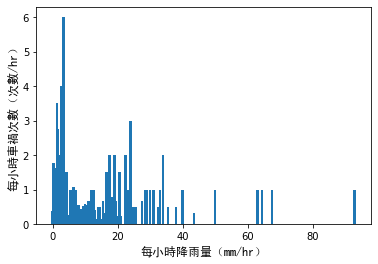

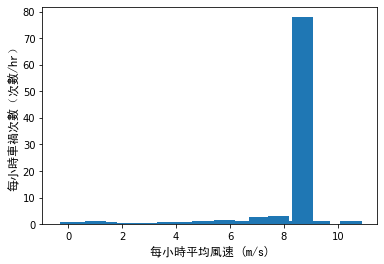

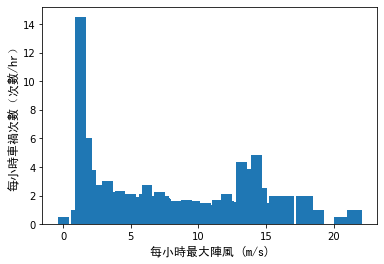

In [28]:
all_rain, all_WS, all_WSGust, count_rain_dic, count_WS_dic, count_WSGust_dic = get_weather_data(Taipei)
new_draw(all_rain,count_rain_dic,"每小時降雨量（mm/hr）","每小時車禍次數（次數/hr）")
new_draw(all_WS, count_WS_dic,"每小時平均風速 (m/s)","每小時車禍次數（次數/hr）"),
new_draw(all_WSGust, count_WSGust_dic,"每小時最大陣風 (m/s)","每小時車禍次數（次數/hr）")

### 新北

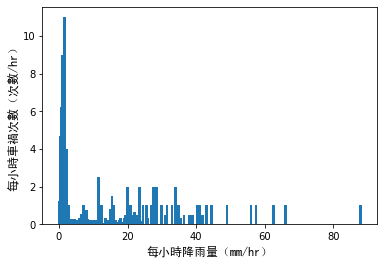

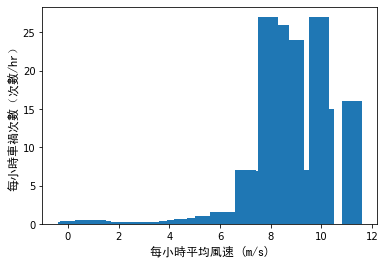

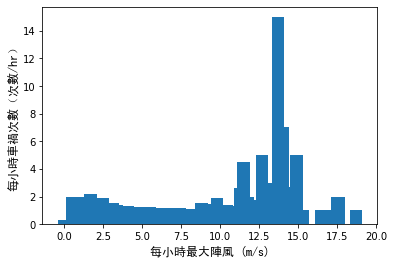

In [29]:
all_rain, all_WS, all_WSGust, count_rain_dic, count_WS_dic, count_WSGust_dic = get_weather_data(New_Taipei)
new_draw(all_rain,count_rain_dic,"每小時降雨量（mm/hr）","每小時車禍次數（次數/hr）")
new_draw(all_WS, count_WS_dic,"每小時平均風速 (m/s)","每小時車禍次數（次數/hr）"),
new_draw(all_WSGust, count_WSGust_dic,"每小時最大陣風 (m/s)","每小時車禍次數（次數/hr）")

### 桃園

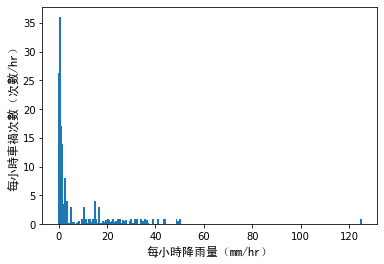

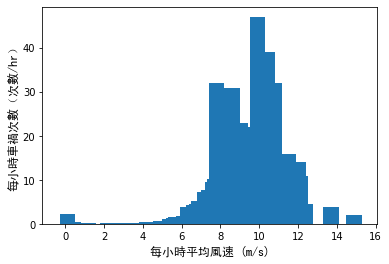

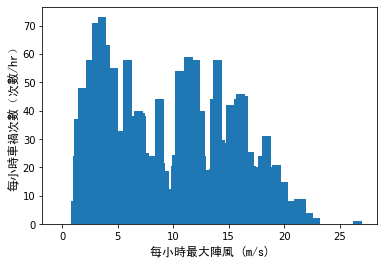

In [30]:
all_rain, all_WS, all_WSGust, count_rain_dic, count_WS_dic, count_WSGust_dic = get_weather_data(Taoyuan)
new_draw(all_rain,count_rain_dic,"每小時降雨量（mm/hr）","每小時車禍次數（次數/hr）")
new_draw(all_WS, count_WS_dic,"每小時平均風速 (m/s)","每小時車禍次數（次數/hr）"),
new_draw(all_WSGust, count_WSGust_dic,"每小時最大陣風 (m/s)","每小時車禍次數（次數/hr）")

### 台南

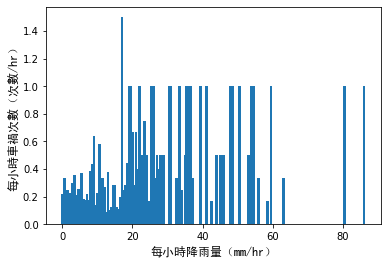

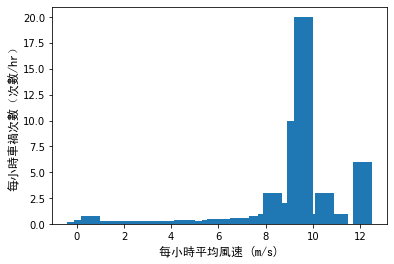

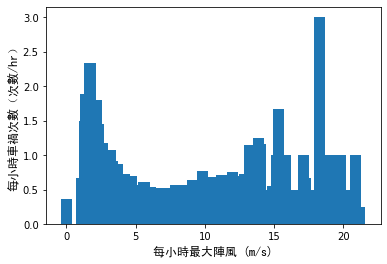

In [31]:
all_rain, all_WS, all_WSGust, count_rain_dic, count_WS_dic, count_WSGust_dic = get_weather_data(Tainan)
new_draw(all_rain,count_rain_dic,"每小時降雨量（mm/hr）","每小時車禍次數（次數/hr）")
new_draw(all_WS, count_WS_dic,"每小時平均風速 (m/s)","每小時車禍次數（次數/hr）"),
new_draw(all_WSGust, count_WSGust_dic,"每小時最大陣風 (m/s)","每小時車禍次數（次數/hr）")

### 高雄

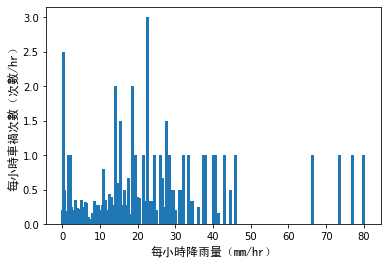

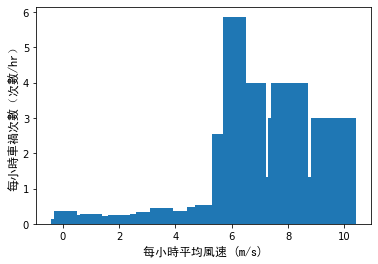

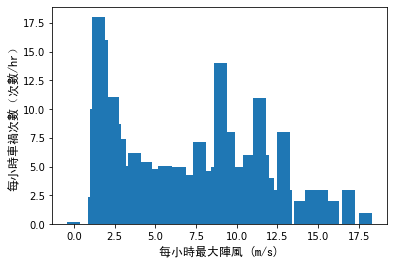

In [32]:
all_rain, all_WS, all_WSGust, count_rain_dic, count_WS_dic, count_WSGust_dic = get_weather_data(Kaohsiung)
new_draw(all_rain,count_rain_dic,"每小時降雨量（mm/hr）","每小時車禍次數（次數/hr）")
new_draw(all_WS, count_WS_dic,"每小時平均風速 (m/s)","每小時車禍次數（次數/hr）"),
new_draw(all_WSGust, count_WSGust_dic,"每小時最大陣風 (m/s)","每小時車禍次數（次數/hr）")

### 台中

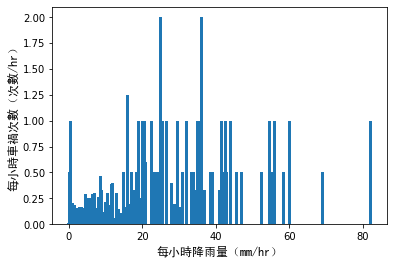

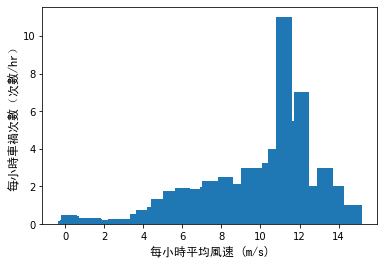

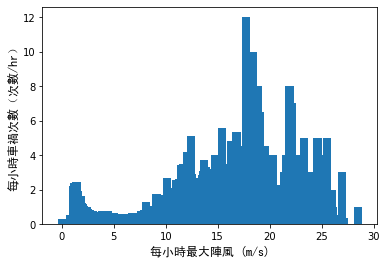

In [34]:
all_rain, all_WS, all_WSGust, count_rain_dic, count_WS_dic, count_WSGust_dic = get_weather_data(Taichung)
new_draw(all_rain,count_rain_dic,"每小時降雨量（mm/hr）","每小時車禍次數（次數/hr）")
new_draw(all_WS, count_WS_dic,"每小時平均風速 (m/s)","每小時車禍次數（次數/hr）"),
new_draw(all_WSGust, count_WSGust_dic,"每小時最大陣風 (m/s)","每小時車禍次數（次數/hr）")